### Exercice 1 – String Edit Distance
On vous demande dans cet exercice de programmer la version recursive du calcul de distance de Levenshtein par programmation dynamique. Les plus téméraires pourront s’attaquer à la version Bottom-up.

In [1]:
cdel = 1
cins = 1
csub = 1
    
def EditDistCost(s1, s2, i, j, memo={}):
    m = len(s1)
    n = len(s2)
    
    # Checks if result is in memo
    if (i, j) in memo:
        return memo[(i, j)]

    # Cas de base: both strings finished
    if i == m and j == n:
        return 0
    
    # Cas de base: If the first word is finished
    elif i == m:
        return abs(n - j)
    
    # Cas de base: If the second word is finished
    elif j == n:
        return abs(m - i)
    
    # If letters are the same, pass to the following
    elif s1[i] == s2[j]:        
        memo[(i, j)] = EditDistCost(s1, s2, i+1, j+1, memo)
    
    # If letters are different
    else: 
        memo[(i, j)] = min(
            EditDistCost(s1, s2, i+1, j, memo) + cdel,
            EditDistCost(s1, s2, i, j+1, memo) + cins,
            EditDistCost(s1, s2, i+1, j+1, memo) + csub
        )
    
    return memo[(i, j)]

In [2]:
s1 = "intention"
s2 = "execution"

m = len(s1)
n = len(s2)

cost = EditDistCost(s1, s2, 0, 0)

print("Levenshtein Distance:", cost)

Levenshtein Distance: 5


### Exercice 2 – 0/1 Knapsack problem
On vous demande dans cet exercice de programmer la version récursive de résolution du problème du sac à dos 0/1 par programmation dynamique.

Vous pourrez tester votre algorithme sur les données fournies sur http://artemisa.unicauca.edu.co/~johnyortega/instances_01_KP/ qui nous serviront de benchmark pour les TP suivants.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os

In [4]:
def Knapsack(itens, i, X, memo):
    if i > len(itens) - 1:
        return 0
    
    if (i, X) in memo:
        return memo[(i, X)]

    wi = itens[i][1] # ri: item value
    ri = itens[i][0] # wi: item weight

    wi = int(wi) 

    p1 = Knapsack(itens, i + 1, X, memo) # Possibility 1: not take the item
    
    # Possibility 2: take the item
    if wi <= X: # checks if it fits in the backpack
        p2 = ri + Knapsack(itens, i + 1, X - wi, memo)
    else:
        p2 = 0 # if doesent fit, return 0
    
    memo[(i, X)] = max(p1, p2)
    return memo[(i, X)]

In [6]:
def knapsack_BU(itens, W):
    W = int(W) 
    n = len(itens)  

    dp = [[0] * (W + 1) for _ in range(n + 1)] # Zero Matrix with (n+1) rows and (W+1) columns 

    for i in range(n): # for each item 
        ri, wi = itens[i] 
        wi = int(wi) 

        for x in range(W + 1):  # Cycle through all possible backpack capacities
            # If you don't get the current item
            dp[i + 1][x] = dp[i][x]

            #  Possibility 2: take the item 
            if wi <= x: # checks if it fits in the backpack
                dp[i + 1][x] = max(dp[i + 1][x], ri + dp[i][x - wi])

    # The maximum possible value is in the last cell of the matrix
    return dp[n][W]

#### Low Dimensional

In [7]:
datasets = []
listing = os.listdir("./instances_01_KP/low-dimensional/")
my_array=np.zeros(shape=(0,5))
for infile in listing:
    path = "./instances_01_KP/low-dimensional/" + infile
    data = np.loadtxt(path)
    datasets.append(data)

In [10]:
rec_times = []
bu_times = []
n_values = []

for dataset in datasets:
    n = dataset[0][0]
    wmax = dataset[0][1]
    itens = dataset[1:]

    memo = {}

    # print(f"\n===Problem with {n:.0f} itens and {wmax:.0f} capacity===")
    tic = time.time()
    rmax = Knapsack(itens, 0, wmax, memo)
    toc = time.time()

    tic2 = time.time()
    rmax = knapsack_BU(itens, wmax)
    toc2 = time.time()
    
    # bb_time = toc - tic
    # bu_time = toc2 - tic2
    
    rec_times.append(toc - tic)
    bu_times.append(toc2 - tic2)
    n_values.append(n)

    # print("Optimum value = ", rmax)
    # print(f"With Memoizaion, compute in {(toc - tic):.4f} seconds")
    # print(f"BottomUp version, compute in {(toc2 - tic2):.4f} seconds")

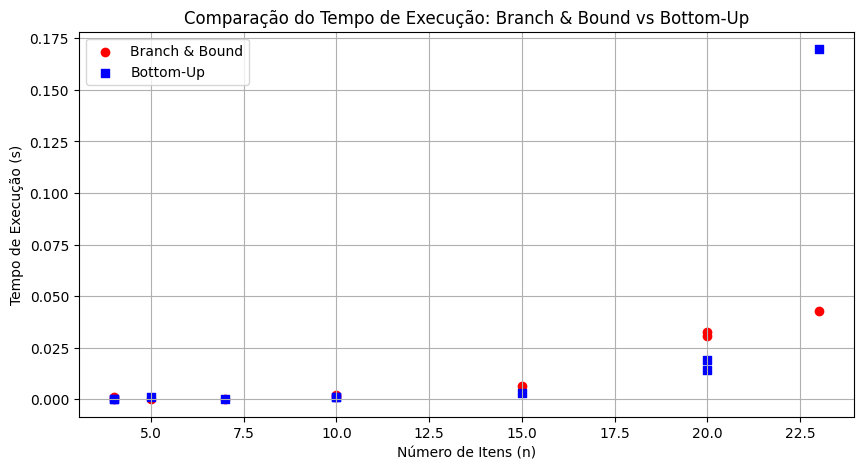

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(n_values, rec_times, marker='o', linestyle='-', color='r', label='Recursivo')
plt.scatter(n_values, bu_times, marker='s', linestyle='-', color='b', label='Bottom-Up')
plt.xlabel("Número de Itens (n)")
plt.ylabel("Tempo de Execução (s)")
plt.title("Comparação do Tempo de Execução: Recursivo vs Bottom-Up")
plt.legend()
plt.grid(True)
plt.show()

ButtomUp version is objectively faster than the recursive version.

#### Large Scale

In [12]:
datasets = []
N_values = []
W_values = []
listing = os.listdir("./instances_01_KP/large_scale/")
my_array=np.zeros(shape=(0,5))
for infile in listing:
    path = os.path.join("./instances_01_KP/large_scale/", infile)
    
    parts = infile.split("_")
    N = int(parts[2])  # Terceiro elemento corresponde a N
    W = int(parts[3])  # Quarto elemento corresponde a W
    
    N_values.append(N)
    W_values.append(W)

    with open(path, "r") as f:
        lines = f.readlines()[:-1]  
    
    data = np.loadtxt(lines)
    datasets.append(data)

In [16]:
i=0
rec_times = []
bu_times = []
n_rec = []
n_bu = []

for dataset in datasets:
    n = N_values[i]
    wmax = W_values[i]
    itens = dataset[1:]

    memo = {}

    try:
        # print(f"\n===Problem with {n:.0f} itens and {wmax:.0f} capacity===")
        tic = time.time()
        rmax = Knapsack(itens, 0, wmax, memo)
        toc = time.time()
        rec_times.append(toc - tic)
        n_rec.append(n)
        # print(f"With recursion, compute in {(toc - tic):.4f} seconds")

    except RecursionError as e:
        print(e)

    tic2 = time.time()
    rmax = knapsack_BU(itens, wmax)
    toc2 = time.time()


    bu_times.append(toc2 - tic2)
    n_bu.append(n)
    
    # print("Optimum value = ", rmax)    
    # print(f"BottomUp version, compute in {(toc2 - tic2):.4f} seconds")
    i = i+1

maximum recursion depth exceeded
maximum recursion depth exceeded
maximum recursion depth exceeded
maximum recursion depth exceeded
maximum recursion depth exceeded
maximum recursion depth exceeded


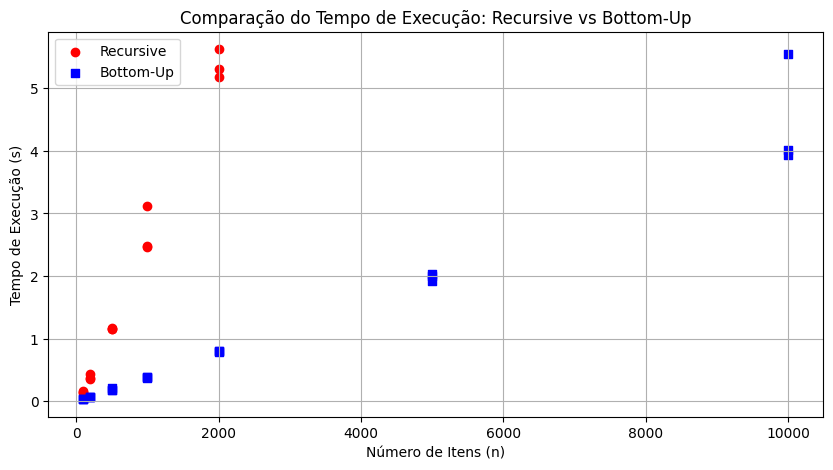

In [17]:
plt.figure(figsize=(10, 5))
plt.scatter(n_rec, rec_times, marker='o', linestyle='-', color='r', label='Recursive')
plt.scatter(n_bu, bu_times, marker='s', linestyle='-', color='b', label='Bottom-Up')
plt.xlabel("Número de Itens (n)")
plt.ylabel("Tempo de Execução (s)")
plt.title("Comparação do Tempo de Execução: Recursive vs Bottom-Up")
plt.legend()
plt.grid(True)
plt.show()

It is impotant to note that the biggest problems exceed the maximum recursion for the Recursive version of the Problem